In [1]:
import wrapper
import kemeny
import matplotlib.pyplot as plt
import numpy as np
import time
import functools
from data_sets_generator import generate_votes

In [2]:
def measure_time():
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            start_time = time.perf_counter()
            result = func(*args, **kwargs)
            end_time = time.perf_counter()
            execution_time = end_time - start_time
            return execution_time
        return wrapper
    return decorator

In [3]:
def plot(results1: list[list[float]], results2: list[list[float]], names: list[str], xlabels: list[str], labels: list[str], title: str) -> None:
    means1 = [np.mean(inner_list) for inner_list in results1]
    means2 = [np.mean(inner_list) for inner_list in results2]

    plt.plot(xlabels, means1)
    plt.plot(xlabels, means2)

    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend(names)

    plt.show()

In [4]:
no_candidates = [i for i in range(2, 11)]
no_votes = 20
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(10)] for num_candidates in no_candidates]

In [5]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_kemeny = measure_time()(kemeny.kemeny_ranking)
c_kemeny = measure_time()(wrapper.kemeny_ranking)

In [6]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_kemeny(vote_sets[i][j]))

In [7]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_kemeny(vote_sets[i][j]))

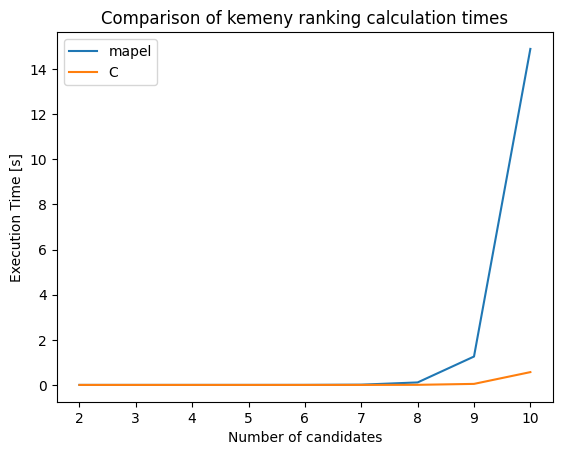

In [8]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of candidates", "Execution Time [s]"], "Comparison of kemeny ranking calculation times")

In [9]:
no_candidates = [10*i for i in range(1, 11)]
no_votes = 200
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(3)] for num_candidates in no_candidates]

In [10]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_local_search_kKemeny_single_k = measure_time()(kemeny.local_search_kKemeny_single_k)
c_local_search_kKemeny_single_k = measure_time()(wrapper.local_search_kKemeny_single_k)

In [11]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_local_search_kKemeny_single_k(vote_sets[i][j], 1, 1))

In [12]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_local_search_kKemeny_single_k(vote_sets[i][j], 1, 1))

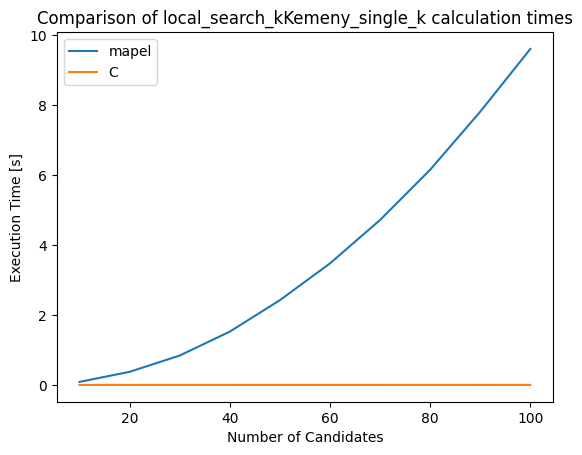

In [13]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Candidates", "Execution Time [s]"], "Comparison of local_search_kKemeny_single_k calculation times")

In [14]:
no_candidates = [i for i in range(2, 11)]
no_votes = 20
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(10)] for num_candidates in no_candidates]

In [15]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_local_search_kKemeny = measure_time()(kemeny.local_search_kKemeny)
c_local_search_kKemeny = measure_time()(wrapper.local_search_kKemeny)

In [16]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_local_search_kKemeny(vote_sets[i][j], 1))

In [17]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_local_search_kKemeny(vote_sets[i][j], 1))

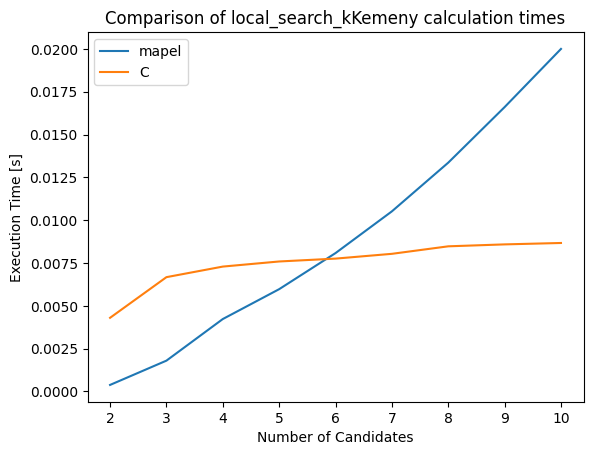

In [18]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Candidates", "Execution Time [s]"], "Comparison of local_search_kKemeny calculation times")

In [19]:
no_candidates = [10*i for i in range(1, 11)]
no_votes = 1000
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(10)] for num_candidates in no_candidates]

In [20]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_agreement = measure_time()(kemeny.agreement_index)
c_agreement = measure_time()(wrapper.agreement_index)

In [21]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_agreement(vote_sets[i][j]))

In [22]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_agreement(vote_sets[i][j]))

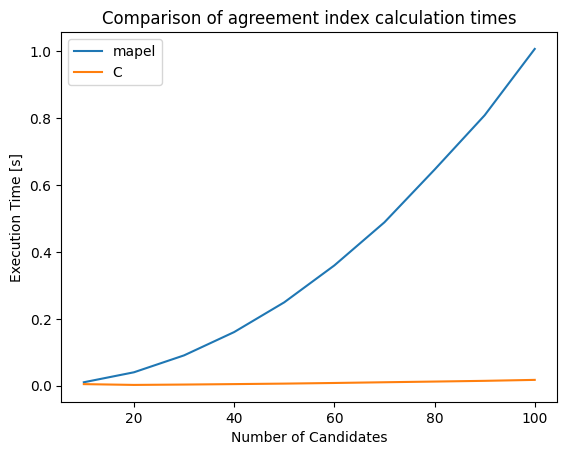

In [23]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Candidates", "Execution Time [s]"], "Comparison of agreement index calculation times")

In [24]:
no_candidates = [10*i for i in range(1, 11)]
no_votes = 100
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(3)] for num_candidates in no_candidates]

In [25]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_polarization = measure_time()(kemeny.polarization_index)
c_polarization = measure_time()(wrapper.polarization_index)

In [26]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_polarization(vote_sets[i][j]))

In [27]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_polarization(vote_sets[i][j]))

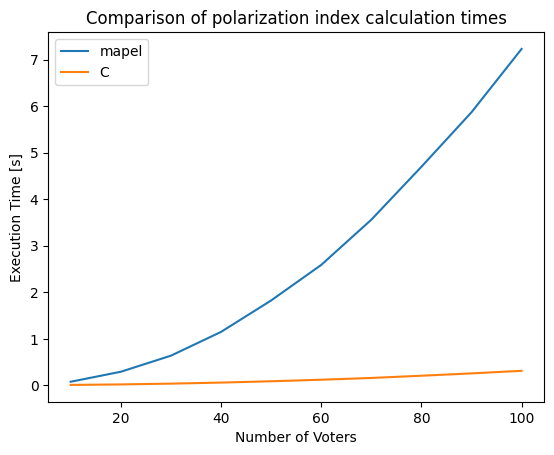

In [28]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Voters", "Execution Time [s]"], "Comparison of polarization index calculation times")

In [29]:
no_candidates = 11
no_votes = [5 * i for i in range(1, 6)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [30]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_diversity = measure_time()(kemeny.diversity_index)
c_diversity = measure_time()(wrapper.diversity_index)

In [31]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_diversity(vote_sets[i][j]))

In [32]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_diversity(vote_sets[i][j]))

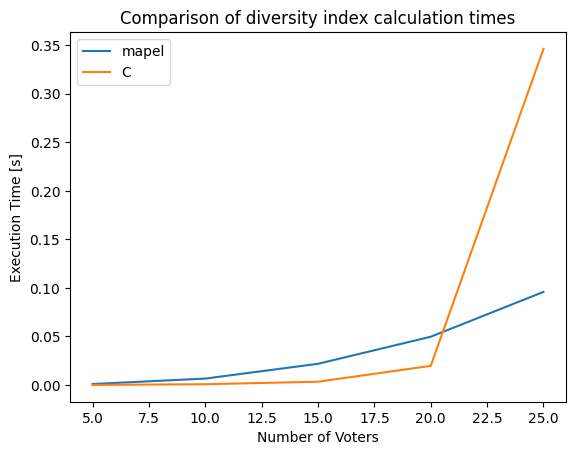

In [33]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of diversity index calculation times")

In [34]:
no_candidates = 11
no_votes = [5 * i for i in range(1, 11)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [35]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_polarization_1by2Kemenys = measure_time()(kemeny.polarization_1by2Kemenys)
c_polarization_1by2Kemenys = measure_time()(wrapper.polarization_1by2Kemenys)

In [36]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_polarization_1by2Kemenys(vote_sets[i][j]))

In [37]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_polarization_1by2Kemenys(vote_sets[i][j]))

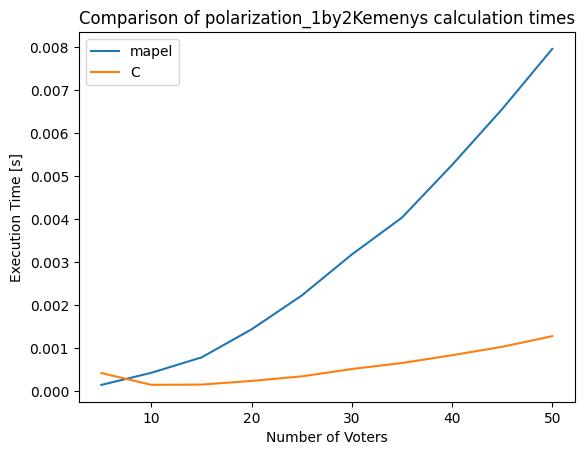

In [38]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of polarization_1by2Kemenys calculation times")

In [39]:
no_candidates = 100
no_votes = [5 * i for i in range(1, 11)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [40]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_greedy_kmeans_summed = measure_time()(kemeny.greedy_kmeans_summed)
c_greedy_kmeans_summed = measure_time()(wrapper.greedy_kmeans_summed)

In [41]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_greedy_kmeans_summed(vote_sets[i][j]))

In [42]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_greedy_kmeans_summed(vote_sets[i][j]))

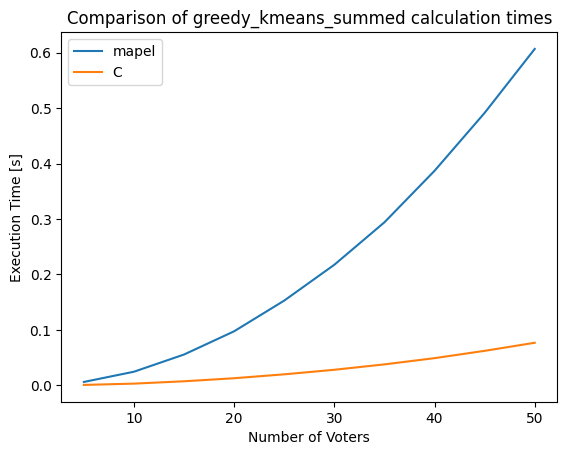

In [43]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of greedy_kmeans_summed calculation times")

In [44]:
no_candidates = 100
no_votes = [5 * i for i in range(1, 11)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [45]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_greedy_kKemenys_summed = measure_time()(kemeny.greedy_kKemenys_summed)
c_greedy_kKemenys_summed = measure_time()(wrapper.greedy_kKemenys_summed)

In [46]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_greedy_kKemenys_summed(vote_sets[i][j]))

In [47]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_greedy_kKemenys_summed(vote_sets[i][j]))

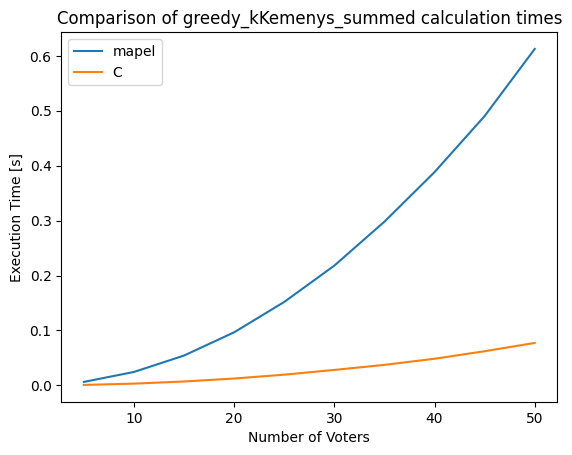

In [48]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of greedy_kKemenys_summed calculation times")

In [49]:
no_candidates = 100
no_votes = [5 * i for i in range(1, 11)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [50]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_greedy_kKemenys_divk_summed = measure_time()(kemeny.greedy_kKemenys_divk_summed)
c_greedy_kKemenys_divk_summed = measure_time()(wrapper.greedy_kKemenys_divk_summed)

In [51]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_greedy_kKemenys_divk_summed(vote_sets[i][j]))

In [52]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_greedy_kKemenys_divk_summed(vote_sets[i][j]))

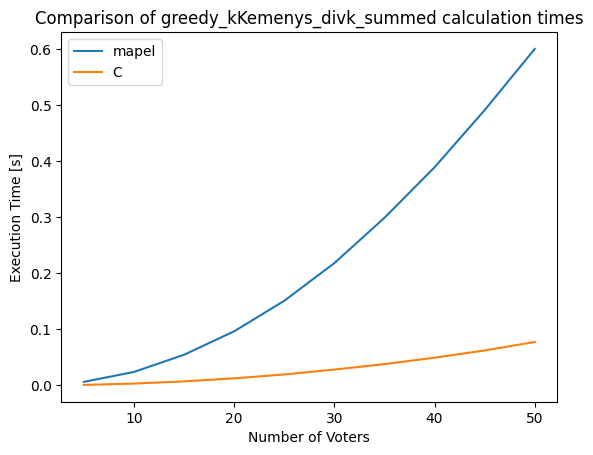

In [53]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of greedy_kKemenys_divk_summed calculation times")

In [54]:
no_candidates = 100
no_votes = [5 * i for i in range(1, 11)]
vote_sets = [[generate_votes(num_votes, no_candidates) for _ in range(3)] for num_votes in no_votes]

In [55]:
mapel_times, c_times = [[] for _ in range(len(no_votes))], [[] for _ in range(len(no_votes))]
mapel_greedy_2kKemenys_summed = measure_time()(kemeny.greedy_2kKemenys_summed)
c_greedy_2kKemenys_summed = measure_time()(wrapper.greedy_2kKemenys_summed)

In [56]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_greedy_2kKemenys_summed(vote_sets[i][j]))

In [57]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_greedy_2kKemenys_summed(vote_sets[i][j]))

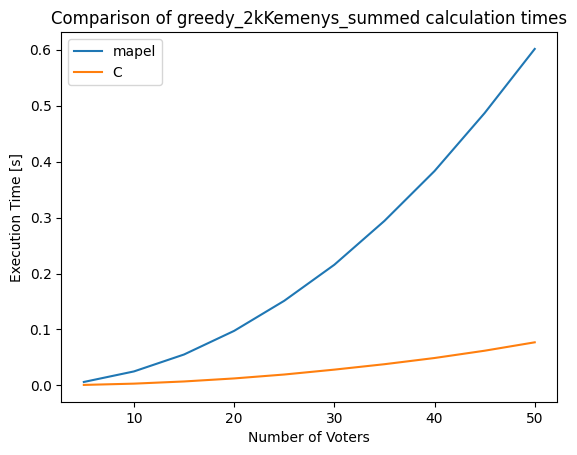

In [58]:
plot(mapel_times, c_times, ['mapel', 'C'], no_votes, ["Number of Voters", "Execution Time [s]"], "Comparison of greedy_2kKemenys_summed calculation times")